In [ ]:
pip install tensorflow_text

In [3]:
######   BERT model, ALBERT - A Lite BERT model  and  RoBERTa - Robustly Optimized BERT Pretraining Approach   ############
import spacy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn


"""
Blueprint of Bidirectional Encoder Representations from Transformers. BERT is a transformer-based machine learning technique for
natural language processing.
Args:
  bert_preprocess : preprocess URL link
  bert_encoder : encoder URL link
  df_balanced : dataframe name
  text_column : text column name
  label_column : target column name
  epochs : number of epochs
Returns: 
  model : BERT model
"""

class BERT():
  def __init__(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs):
    """Inits the BERT"""
    self.bert_preprocess = bert_preprocess
    self.bert_encoder = bert_encoder
    self.df_balanced = df_balanced
    self.text_column = text_column
    self.label_column = label_column
    self.epochs = epochs

  
  def func_bert(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs):
    """Perform the Bidirectional Encoder Representations from Transformers"""
    # Split it into training and test data set
    X_train, X_test, y_train, y_test = train_test_split(df_balanced[text_column], df_balanced[label_column], stratify=df_balanced['spam'])


    # Bert layers
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess(text_input)
    outputs = bert_encoder(preprocessed_text)

    # Neural network layers
    l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
    l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

    # Use inputs and outputs to construct a final model
    model = tf.keras.Model(inputs=[text_input], outputs = [l])

    #model.summary()
    METRICS = [
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=METRICS)

    # train the model
    model.fit(X_train, y_train, epochs=epochs)
    
    y_predicted = model.predict(X_test)
    y_predicted = y_predicted.flatten()

    y_predicted = np.where(y_predicted > 0.5, 1, 0)

    print(classification_report(y_test, y_predicted)) 
    cm = confusion_matrix(y_test, y_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    return model
 
  def run_all(self):
    """Run all the methods as per the requirements"""
    model = self.func_bert(self.bert_preprocess, self.bert_encoder, self.df_balanced, self.text_column, self.label_column, self.epochs)
    return model

# # import BERT model
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# # #import ALBERT - A Lite BERT model
# # bert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")

# # #import RoBERTa - Robustly Optimized BERT Pretraining Approach
# # bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")


# df = pd.read_csv("spam.csv")
# df.head()

# df_balanced = df
# df_balanced['spam']=df_balanced['Class'].apply(lambda x: 1 if x=='spam' else 0)
# df_balanced.head()

# #class Bert 
# bertExe = BERT(bert_preprocess,  bert_encoder, df_balanced, 'sms', 'spam', 2)
# model = bertExe.run_all()

Epoch 1/2
252/252 [==============================] - 3981s 16s/step - loss: 0.4708 - accuracy: 0.7853 - precision: 0.3083 - recall: 0.0220
Epoch 2/2
84/84 [==============================] - 1281s 15s/step
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2124
           1       0.91      0.32      0.48       562

    accuracy                           0.85      2686
   macro avg       0.88      0.66      0.69      2686
weighted avg       0.86      0.85      0.82      2686



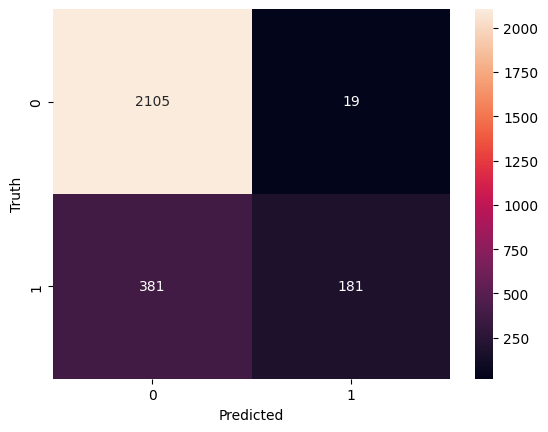

In [5]:
# #import BERT model
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# # #import ALBERT - A Lite BERT model
# # bert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")

# # #import RoBERTa - Robustly Optimized BERT Pretraining Approach
# # bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")

import numpy as np
import pandas as pd


df = pd.read_csv("/content/spam.csv")
df.head()

df_balanced = df[['labels','text']]
df_balanced['spam']=df_balanced['labels'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.head()

# # #class Bert 
bertExe = BERT(bert_preprocess,  bert_encoder, df_balanced, 'text', 'spam', 2)
model = bertExe.run_all()

In [ ]:
df['labels'].value_counts(normalize=True) * 100